In [3]:
#practising this https://towardsdatascience.com/sql-at-scale-with-apache-spark-sql-and-dataframes-concepts-architecture-and-examples-c567853a702f

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
pip install matplotlib

     |████████████████████████████████| 12.5MB 18.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
#downloading the data file
import urllib.request

#urllib.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
filename="kddcup.data_10_percent.gz"
data = urllib.request.urlretrieve(url,filename)

In [10]:
data_file = "/Users/kanthkr/work/spark/spark_programs/kddcup.data_10_percent.gz"
#building a spark session
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option","some-value") \
        .getOrCreate()


In [11]:
#reading the text file 
sc = spark.sparkContext
raw_rdd = sc.textFile(data_file).cache()

In [13]:
raw_rdd.take(5)
type(raw_rdd)

pyspark.rdd.RDD

In [14]:
#converting the raw rdd to csv
csv_rdd = raw_rdd.map(lambda row: row.split(","))
csv_rdd.take(2)

[['0',
  'tcp',
  'http',
  'SF',
  '181',
  '5450',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '1.00',
  '0.00',
  '0.00',
  '9',
  '9',
  '1.00',
  '0.00',
  '0.11',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'normal.'],
 ['0',
  'tcp',
  'http',
  'SF',
  '239',
  '486',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '1.00',
  '0.00',
  '0.00',
  '19',
  '19',
  '1.00',
  '0.00',
  '0.05',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'normal.']]

In [15]:
print(type(csv_rdd.take(2)))

<class 'list'>


In [16]:
len(csv_rdd.take(1)[0])

42

In [17]:
# out of the above 42 columns we are only focussed on a few
from pyspark.sql import Row

parsed_rdd = csv_rdd.map(lambda r: Row(
    duration=int(r[0]), 
    protocol_type=r[1],
    service=r[2],
    flag=r[3],
    src_bytes=int(r[4]),
    dst_bytes=int(r[5]),
    wrong_fragment=int(r[7]),
    urgent=int(r[8]),
    hot=int(r[9]),
    num_failed_logins=int(r[10]),
    num_compromised=int(r[12]),
    su_attempted=r[14],
    num_root=int(r[15]),
    num_file_creations=int(r[16]),
    label=r[-1]
    )
)
parsed_rdd.take(5)

[Row(dst_bytes=5450, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=181, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=486, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=239, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=235, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=219, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=2032, duration=0, flag

In [18]:
#create a dataframe out of the rdd
df = spark.createDataFrame(parsed_rdd)

In [21]:
df.head(10)

[Row(dst_bytes=5450, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=181, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=486, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=239, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=235, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=219, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=2032, duration=0, flag

In [22]:
df.printSchema()

root
 |-- dst_bytes: long (nullable = true)
 |-- duration: long (nullable = true)
 |-- flag: string (nullable = true)
 |-- hot: long (nullable = true)
 |-- label: string (nullable = true)
 |-- num_compromised: long (nullable = true)
 |-- num_failed_logins: long (nullable = true)
 |-- num_file_creations: long (nullable = true)
 |-- num_root: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- su_attempted: string (nullable = true)
 |-- urgent: long (nullable = true)
 |-- wrong_fragment: long (nullable = true)



In [24]:
#create a view on top of rdd
df.createOrReplaceTempView("connections")

In [26]:
#now perform sql to get the answers
protocols = spark.sql("""
            SELECT protocol_type, count(*) as freq
                           FROM connections
                           GROUP BY protocol_type
                           ORDER BY 2 DESC""")
protocols.show()

+-------------+------+
|protocol_type|  freq|
+-------------+------+
|         icmp|283602|
|          tcp|190065|
|          udp| 20354|
+-------------+------+



In [28]:
labels = spark.sql("""
             SELECT label, count(*) as freq
                           FROM connections
                           GROUP BY label
                           ORDER BY 2 DESC""")

labels.show()

+----------------+------+
|           label|  freq|
+----------------+------+
|          smurf.|280790|
|        neptune.|107201|
|         normal.| 97278|
|           back.|  2203|
|          satan.|  1589|
|        ipsweep.|  1247|
|      portsweep.|  1040|
|    warezclient.|  1020|
|       teardrop.|   979|
|            pod.|   264|
|           nmap.|   231|
|   guess_passwd.|    53|
|buffer_overflow.|    30|
|           land.|    21|
|    warezmaster.|    20|
|           imap.|    12|
|        rootkit.|    10|
|     loadmodule.|     9|
|      ftp_write.|     8|
|       multihop.|     7|
+----------------+------+
only showing top 20 rows



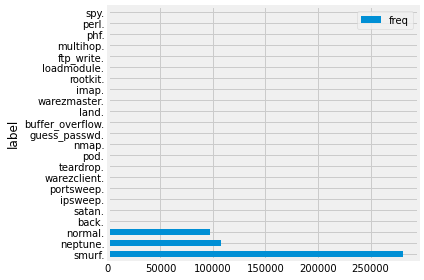

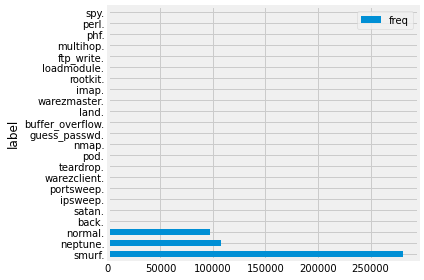

In [29]:
#plotting a chart
labels_df = pd.DataFrame(labels.toPandas())
labels_df.set_index("label",drop=True,inplace=True)
labels_fig = labels_df.plot(kind='barh')
plt.rcParams["figure.figsize"]=(7,5)
plt.rcParams.update({'font.size': 10})
plt.tight_layout()
display(labels_fig.figure)

In [30]:
#attack_protocol

attack_protocol=spark.sql("""
                            SELECT 
                             protocol_type, 
                             CASE label
                               WHEN 'normal.' THEN 'no attack'
                               ELSE 'attack'
                             END AS state,
                             COUNT(*) as freq
                           FROM connections
                           GROUP BY protocol_type, state
                           ORDER BY 3 DESC
                           """)

attack_protocol.show()

+-------------+---------+------+
|protocol_type|    state|  freq|
+-------------+---------+------+
|         icmp|   attack|282314|
|          tcp|   attack|113252|
|          tcp|no attack| 76813|
|          udp|no attack| 19177|
|         icmp|no attack|  1288|
|          udp|   attack|  1177|
+-------------+---------+------+



In [32]:
attack_stats = spark.sql("""
                    SELECT 
                             protocol_type, 
                             CASE label
                               WHEN 'normal.' THEN 'no attack'
                               ELSE 'attack'
                             END AS state,
                             COUNT(*) as total_freq,
                             ROUND(AVG(src_bytes), 2) as mean_src_bytes,
                             ROUND(AVG(dst_bytes), 2) as mean_dst_bytes,
                             ROUND(AVG(duration), 2) as mean_duration,
                             SUM(num_failed_logins) as total_failed_logins,
                             SUM(num_compromised) as total_compromised,
                             SUM(num_file_creations) as total_file_creations,
                             SUM(su_attempted) as total_root_attempts,
                             SUM(num_root) as total_root_acceses
                           FROM connections
                           GROUP BY protocol_type, state
                           ORDER BY 3 DESC
""")
attack_stats.show()

+-------------+---------+----------+--------------+--------------+-------------+-------------------+-----------------+--------------------+-------------------+------------------+
|protocol_type|    state|total_freq|mean_src_bytes|mean_dst_bytes|mean_duration|total_failed_logins|total_compromised|total_file_creations|total_root_attempts|total_root_acceses|
+-------------+---------+----------+--------------+--------------+-------------+-------------------+-----------------+--------------------+-------------------+------------------+
|         icmp|   attack|    282314|        932.14|           0.0|          0.0|                  0|                0|                   0|                0.0|                 0|
|          tcp|   attack|    113252|       9880.38|        881.41|        23.19|                 57|             2269|                  76|                1.0|               152|
|          tcp|no attack|     76813|       1439.31|       4263.97|        11.08|                 18|     

In [33]:
tcp_attack_stats = spark.sql("""
                         SELECT 
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM connections
                                   WHERE protocol_type = 'tcp'
                                   AND label != 'normal.'
                                   GROUP BY service, attack_type
                                   ORDER BY total_freq DESC
                                   """)
tcp_attack_stats.show()

+----------+------------+----------+-------------+-------------------+--------------------+-------------------+------------------+
|   service| attack_type|total_freq|mean_duration|total_failed_logins|total_file_creations|total_root_attempts|total_root_acceses|
+----------+------------+----------+-------------+-------------------+--------------------+-------------------+------------------+
|   private|    neptune.|    101317|          0.0|                  0|                   0|                0.0|                 0|
|      http|       back.|      2203|         0.13|                  0|                   0|                0.0|                 0|
|     other|      satan.|      1221|          0.0|                  0|                   0|                0.0|                 0|
|   private|  portsweep.|       725|      1915.81|                  0|                   0|                0.0|                 0|
|  ftp_data|warezclient.|       708|       403.71|                  0|             

In [34]:
tcp_attack_stats = spark.sql("""
                                   SELECT 
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM connections
                                   WHERE (protocol_type = 'tcp'
                                          AND label != 'normal.')
                                   GROUP BY service, attack_type
                                   HAVING (mean_duration >= 50
                                           AND total_file_creations >= 5
                                           AND total_root_acceses >= 1)
                                   ORDER BY total_freq DESC
                                   """)
tcp_attack_stats.show()

+-------+----------------+----------+-------------+-------------------+--------------------+-------------------+------------------+
|service|     attack_type|total_freq|mean_duration|total_failed_logins|total_file_creations|total_root_attempts|total_root_acceses|
+-------+----------------+----------+-------------+-------------------+--------------------+-------------------+------------------+
| telnet|buffer_overflow.|        21|       130.67|                  0|                  15|                0.0|                 5|
| telnet|     loadmodule.|         5|         63.8|                  0|                   9|                0.0|                 3|
| telnet|       multihop.|         2|        458.0|                  0|                   8|                0.0|                93|
+-------+----------------+----------+-------------+-------------------+--------------------+-------------------+------------------+



In [35]:
tcp_attack_stats = spark.sql("""
                                   SELECT 
                                     t.service,
                                     t.attack_type,
                                     t.total_freq
                                   FROM
                                   (SELECT 
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM connections
                                   WHERE protocol_type = 'tcp'
                                   AND label != 'normal.'
                                   GROUP BY service, attack_type
                                   ORDER BY total_freq DESC) as t
                                     WHERE t.mean_duration > 0 
                                   """)
tcp_attack_stats.show()

+--------+----------------+----------+
| service|     attack_type|total_freq|
+--------+----------------+----------+
|    http|           back.|      2203|
| private|      portsweep.|       725|
|ftp_data|    warezclient.|       708|
|     ftp|    warezclient.|       307|
|   other|      portsweep.|       260|
| private|          satan.|       170|
|  telnet|   guess_passwd.|        53|
|  telnet|buffer_overflow.|        21|
|ftp_data|    warezmaster.|        18|
|   imap4|           imap.|        12|
|   other|    warezclient.|         5|
|  telnet|     loadmodule.|         5|
|  telnet|        rootkit.|         5|
|    http|            phf.|         4|
|  supdup|      portsweep.|         4|
|csnet_ns|      portsweep.|         3|
|   pop_3|      portsweep.|         3|
|    http|        ipsweep.|         3|
|    http|      portsweep.|         3|
|  gopher|        ipsweep.|         3|
+--------+----------------+----------+
only showing top 20 rows



In [37]:
(tcp_attack_stats.groupby('service')
                         .pivot('attack_type')
                         .agg({'total_freq':'max'})
                         .na.fill(0)).show()

+---------+-----+----------------+----------+-------------+-----+--------+-----------+---------+-----+----+----------+--------+------+----+------------+------------+
|  service|back.|buffer_overflow.|ftp_write.|guess_passwd.|imap.|ipsweep.|loadmodule.|multihop.|perl.|phf.|portsweep.|rootkit.|satan.|spy.|warezclient.|warezmaster.|
+---------+-----+----------------+----------+-------------+-----+--------+-----------+---------+-----+----+----------+--------+------+----+------------+------------+
|   telnet|    0|              21|         0|           53|    0|       1|          5|        2|    3|   0|         0|       5|     1|   2|           0|           0|
|      ftp|    0|               1|         2|            0|    0|       1|          1|        2|    0|   0|         0|       1|     1|   0|         307|           2|
|    pop_3|    0|               0|         0|            0|    0|       0|          0|        0|    0|   0|         3|       0|     1|   0|           0|           0|
|  d